In [7]:
import time
import timeit
import numpy as np

from mgcpy.independence_tests.mgc.mgc import MGC
from mgcpy.benchmarks import simulations as sims

In [8]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [9]:
def mgc(X, Y, is_fast=False):
    mgc = MGC()
#     mgc_statistic, independence_test_metadata = mgc.test_statistic(X, Y)
    p_value, metadata = mgc.p_value(X, Y, is_fast=is_fast)  # p-value call has mgc.test_statistic(X, Y) call
#     print("MGC stats from Python:")
#     print("MGC test statistic:", metadata["test_statistic"])
#     print("P Value:", p_value)
#     print("Optimal Scale:", metadata["optimal_scale"])
    return p_value, metadata

In [10]:
import matplotlib.pyplot as plt;
import seaborn as sns
sns.color_palette('Set1')
sns.set(color_codes=True, style='white', context='talk', font_scale=2)

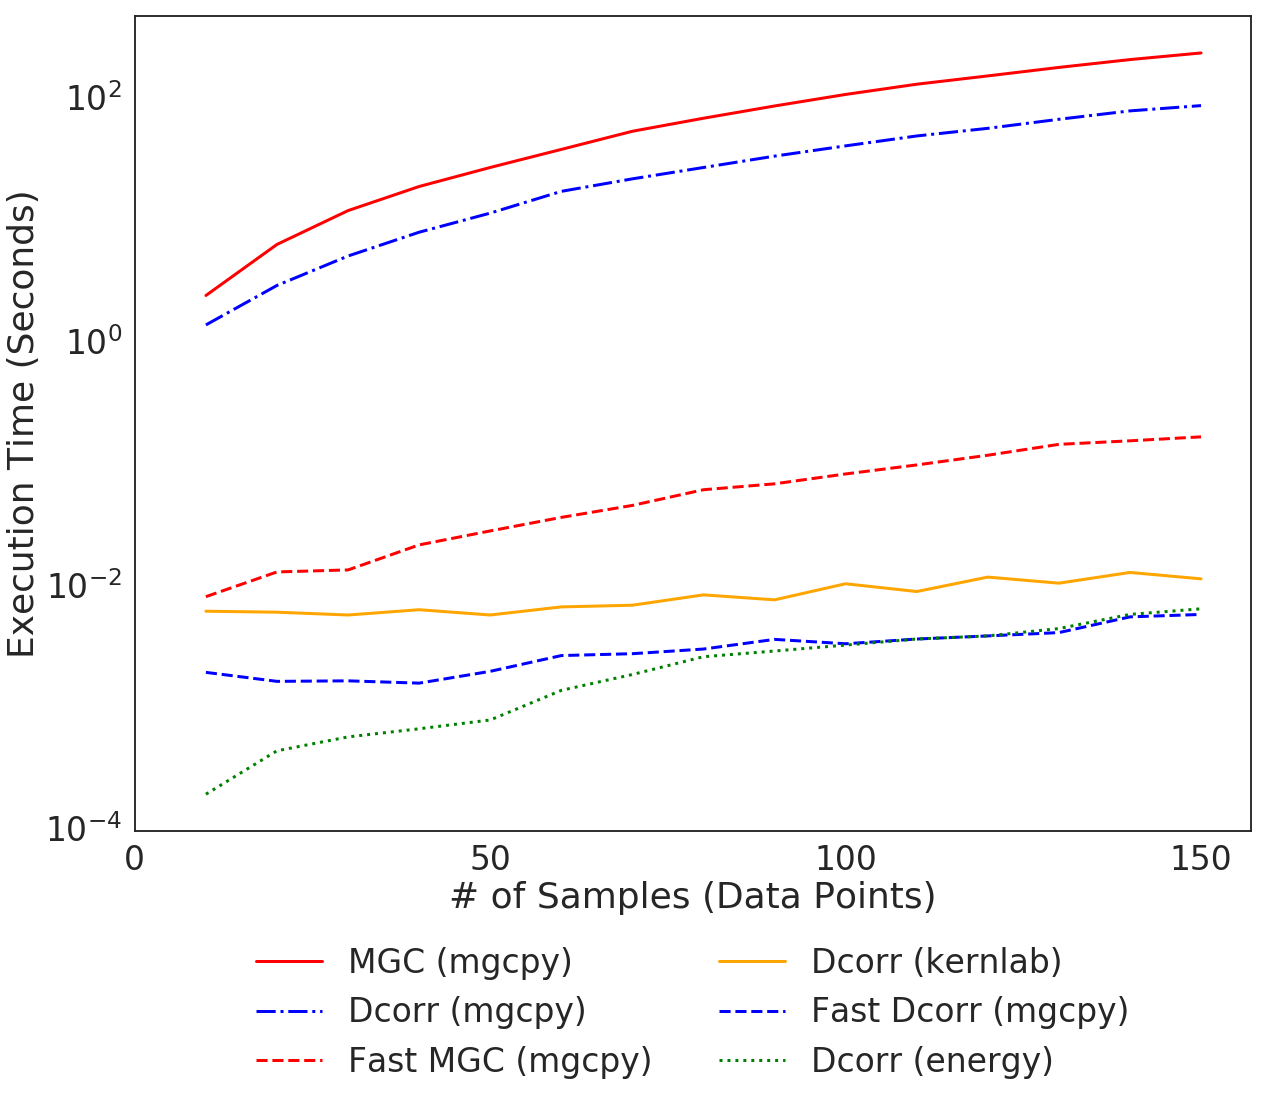

In [14]:
num_samples = range(10, 151, 10)
linear_data_dcorr_times = [(10, [1.338857016991824, 1.2757414609659463, 1.2779263269621879, 1.4971145219751634, 1.3661146109807305]), 
                           (20, [2.8680544089875184, 2.87015632604016, 2.728754689975176, 2.8876148290000856, 2.890731868974399]), 
                           (30, [5.032408714003395, 4.969336921989452, 4.934050586016383, 4.95871455501765, 4.946530134009663]), 
                           (40, [7.999172992014792, 7.848493886995129, 7.731969874002971, 7.740541153005324, 7.625895873003174]), 
                           (50, [10.81704160303343, 11.116306754993275, 11.214253887010273, 11.362716250005178, 11.366938438965008]), 
                           (60, [18.07483608595794, 15.904782090976369, 17.116227485996205, 17.64618211099878, 15.549220753018744]), 
                           (70, [22.56243832403561, 20.79431069199927, 21.139240577991586, 21.381752497982234, 20.882448325050063]), 
                           (80, [26.60254893900128, 26.625501686998177, 27.297777889005374, 26.655231295968406, 25.129886200011242]), 
                           (90, [32.88909237500047, 33.1772776839789, 32.75596649199724, 33.18418929097243, 31.98979727498954]), 
                           (100, [40.717417851963546, 40.31093926599715, 39.18663591099903, 39.284123717981856, 39.613843587983865]), 
                           (110, [47.1687217259896, 47.23789670702536, 47.77898542000912, 50.29210359300487, 47.594653180975]), 
                           (120, [55.56740204896778, 55.87813897395972, 54.004372351046186, 54.95389352401253, 56.913238506007474]), 
                           (130, [66.20663257600972, 64.53097786597209, 66.60136964300182, 66.44064873602474, 65.23120342200855]), 
                           (140, [75.94843081396539, 77.61276641098084, 75.93916373699903, 76.49872068100376, 79.62616679898929]), 
                           (150, [85.9680890890304, 86.16587820299901, 83.19360252196202, 84.42991423199419, 86.2413115259842])]
dcorr_times = [j for i, j in linear_data_dcorr_times]
r_energy_times = {10: [0.00036885000008624047, 0.0001439399999071611, 0.0001404799999363604, 0.0001448700000764802, 0.00015337000004365109], 
                  20: [0.00017764000003808178, 0.00016732000003685243, 0.00015347999997175066, 0.00015325999993365258, 0.0015105000002222368], 
                  30: [0.00057177999998239102, 0.00058964000009873416, 0.00055007000001787674, 0.00054971000000514323, 0.00054953000008972595], 
                  40: [0.00067879000006360002, 0.0006494500000262633, 0.00064922999998816522, 0.00064936000006855465, 0.00064947999989090022], 
                  50: [0.00079441000004007947, 0.00079188999995094491, 0.00078466000001353677, 0.00079512999988364754, 0.0007040600000327686], 
                  60: [0.0013760999997146428, 0.0013501999997592065, 0.0013124999992840458, 0.00134360000033339, 0.0013871000016195467], 
                  70: [0.0017228999988437863, 0.001769400000741007, 0.001714899999066256, 0.001777399999811314, 0.0021544000011199387], 
                  80: [0.0025700999997061444, 0.0025376000009302516, 0.0025518000006239163, 0.002599999999499414, 0.002526500000790111], 
                  90: [0.002893799999987823, 0.00282030000067316, 0.0028293999995308695, 0.0028194999993313104, 0.0028819000007293653], 
                  100: [0.0032005999991175486, 0.0031192999995255377, 0.0032257000002573477, 0.0030858000009175157, 0.0033046999997168314], 
                  110: [0.003828599999906146, 0.0033862000000226544, 0.0033934000002773246, 0.0036777999994228594, 0.0035795000003417954], 
                  120: [0.004002899999250076, 0.003658599998743739, 0.0036939999990863726, 0.0039300999997067265, 0.0036588000002666377], 
                  130: [0.004377400000116904, 0.004322500000044238, 0.004345600000608829, 0.004383800000444171, 0.00434389999928535], 
                  140: [0.004807999999987078, 0.00469210000038438, 0.005851200001011603, 0.0072083999999042135, 0.005888500001269858], 
                  150: [0.00877079999978887, 0.006682099999528145, 0.005372900000514346, 0.005203200000929064, 0.005598899999918649]}
r_kernlab_times = {10: [0.005800009, 0.005409002, 0.0081141, 0.005486965, 0.005403042], 
                   20: [0.006284952, 0.00515914, 0.005064964, 0.007796049, 0.005354881], 
                   30: [0.006037951, 0.005739927, 0.005093813, 0.005733013, 0.005522966], 
                   40: [0.008027077, 0.006855965, 0.005250931, 0.005259991, 0.005685091], 
                   50: [0.005580902, 0.005359888, 0.005885839, 0.005364895, 0.005940914], 
                   60: [0.006202936, 0.008973122, 0.006098032, 0.005418062, 0.006091833], 
                   70: [0.00652504, 0.006326199, 0.007157087, 0.006608009, 0.00722599], 
                   80: [0.007471085, 0.007386923, 0.007181883, 0.01212096, 0.006991863], 
                   90: [0.007548094, 0.007166862, 0.007454157, 0.00783205, 0.007458925], 
                   100: [0.009032011, 0.00812006, 0.009864092, 0.0158, 0.007955074], 
                   110: [0.008589983, 0.008877993, 0.008704901, 0.008788824, 0.008870125], 
                   120: [0.009423018, 0.009198904, 0.009953976, 0.01061106, 0.01838398], 
                   130: [0.00962019, 0.010324, 0.01016498, 0.01038408, 0.01082778], 
                   140: [0.0108819, 0.0107379, 0.01108289, 0.01211214, 0.01804495], 
                   150: [0.01069212, 0.01136613, 0.01131797, 0.01097703, 0.01133394]}
linear_data_copy = [(10, [2.416493500000797, 2.3055885000030685, 2.3488579000004393, 2.311741699999402, 2.3961834000001545]), 
                    (20, [5.843312900000456, 5.701738699997804, 5.876486799999839, 6.847185500002524, 6.641605400000117]), 
                    (30, [11.588204300001962, 12.308888699997624, 11.821470699997008, 11.307599399999162, 11.57274740000139]), 
                    (40, [19.350282700001117, 18.887838899998314, 18.6136391, 17.81128929999977, 17.731544599999324]), 
                    (50, [26.472209499999735, 26.63387259999945, 26.36487919999854, 26.442417400001432, 26.46691120000105]), 
                    (60, [37.22881159999815, 37.09970280000198, 37.09522229999857, 37.1519444000005, 37.630584099999396]), 
                    (70, [51.89521190000232, 52.96269460000258, 53.22359019999931, 53.15724809999665, 51.17231950000132]), 
                    (80, [67.44913280000037, 66.7482975999992, 66.90114639999956, 67.44180229999984, 67.05489820000003]), 
                    (90, [85.5883797000024, 83.8362417999997, 84.945134900001, 84.71821830000044, 84.00256679999802]), 
                    (100, [100.66004139999859, 102.7960133000015, 106.26846699999805, 107.8423094000027, 108.65617589999965]), 
                    (110, [127.19750509999722, 128.09759439999834, 129.74209189999965, 126.53313349999735, 126.72032460000264]), 
                    (120, [148.15160859999742, 150.0520170000018, 152.94209399999818, 146.87277449999965, 148.77992359999917]), 
                    (130, [176.03773530000035, 175.9238480999993, 174.55988100000104, 174.8497181999992, 175.40534339999795]), 
                    (140, [194.3387307999983, 203.77896110000074, 207.5943507000011, 205.3508984, 205.51073949999773]), 
                    (150, [235.9271211999985, 233.68393540000034, 231.137610400001, 227.1348579000005, 224.5113261000006])]
python_perf_times = [j for i, j in linear_data_copy]
linear_data_fast_mgc = [(10, [0.009937260998412967, 0.006971208960749209, 0.00851285899989307, 0.007001145975664258, 0.007364065037108958]), 
                        (20, [0.013805667986162007, 0.012984061962924898, 0.012354757986031473, 0.013664765981957316, 0.010665838024578989]), 
                        (30, [0.01729093200992793, 0.012268604943528771, 0.012671170989051461, 0.011940094991587102, 0.011755009065382183]), 
                        (40, [0.020842907018959522, 0.018102316069416702, 0.022479727980680764, 0.02483542903792113, 0.019535422092303634]), 
                        (50, [0.03613659495022148, 0.026224412955343723, 0.025395689997822046, 0.024829013971611857, 0.02520094090141356]), 
                        (60, [0.034173641935922205, 0.03446560900192708, 0.03535817901138216, 0.039391946978867054, 0.034553198027424514]), 
                        (70, [0.04626641294453293, 0.04520784202031791, 0.04255034390371293, 0.04290726501494646, 0.04613724094815552]), 
                        (80, [0.06585719098802656, 0.057089149951934814, 0.05837591795716435, 0.058390229009091854, 0.06029797799419612]), 
                        (90, [0.06505067890975624, 0.06504994304850698, 0.06521781696937978, 0.07156319194473326, 0.06859320495277643]), 
                        (100, [0.08849724300671369, 0.0775414330419153, 0.07958152203354985, 0.07980452594347298, 0.0788903699722141]), 
                        (110, [0.09184161003213376, 0.08922904101200402, 0.09646733594127, 0.09718551696278155, 0.10458254802506417]), 
                        (120, [0.1191785610280931, 0.11659046495333314, 0.10537252889480442, 0.1160321970237419, 0.11862371896859258]), 
                        (130, [0.13264634809456766, 0.13590998807922006, 0.15327011398039758, 0.14836418896447867, 0.137127390014939]), 
                        (140, [0.15582118893507868, 0.1476625050418079, 0.1529817070113495, 0.15209201897960156, 0.14758490701206028]), 
                        (150, [0.16182203008793294, 0.17047211597673595, 0.16169877001084387, 0.15995072096120566, 0.16114080895204097])]
linear_data_fast_dcorr = [(10, [0.0036885000008624047, 0.001439399999071611, 0.001404799999363604, 0.001448700000764802, 0.0015337000004365109]), 
                          (20, [0.0017764000003808178, 0.0016732000003685243, 0.0015347999997175066, 0.0015325999993365258, 0.0015105000002222368]), 
                          (30, [0.0017177999998239102, 0.0018964000009873416, 0.0015007000001787674, 0.0014971000000514323, 0.0014953000008972595]), 
                          (40, [0.0017879000006360002, 0.001494500000262633, 0.0014922999998816522, 0.0014936000006855465, 0.0014947999989090022]), 
                          (50, [0.0019441000004007947, 0.0019188999995094491, 0.0018466000001353677, 0.0019512999988364754, 0.002040600000327686]), 
                          (60, [0.0025760999997146428, 0.0029501999997592065, 0.0025124999992840458, 0.00244360000033339, 0.0025871000016195467]), 
                          (70, [0.0027228999988437863, 0.002669400000741007, 0.002814899999066256, 0.002677399999811314, 0.0026544000011199387]), 
                          (80, [0.0035700999997061444, 0.0028376000009302516, 0.0027518000006239163, 0.002899999999499414, 0.002726500000790111]), 
                          (90, [0.003093799999987823, 0.00352030000067316, 0.0042293999995308695, 0.0036194999993313104, 0.0032819000007293653]), 
                          (100, [0.0036005999991175486, 0.0031192999995255377, 0.0032257000002573477, 0.0030858000009175157, 0.0033046999997168314]), 
                          (110, [0.003828599999906146, 0.0033862000000226544, 0.0033934000002773246, 0.0036777999994228594, 0.0035795000003417954]), 
                          (120, [0.004002899999250076, 0.003658599998743739, 0.0036939999990863726, 0.0039300999997067265, 0.0036588000002666377]), 
                          (130, [0.004177400000116904, 0.003922500000044238, 0.004045600000608829, 0.004083800000444171, 0.00394389999928535]), 
                          (140, [0.004507999999987078, 0.00429210000038438, 0.005651200001011603, 0.0070083999999042135, 0.005688500001269858]), 
                          (150, [0.00817079999978887, 0.005982099999528145, 0.004672900000514346, 0.004603200000929064, 0.004998899999918649])]
python_perf_times_fast_mgc = [j for i, j in linear_data_fast_mgc]
python_perf_times_fast_dcorr = [j for i, j in linear_data_fast_dcorr]
mgcpy_data = [np.mean(i) for i in python_perf_times]
fastmgc_data = [np.mean(i) for i in python_perf_times_fast_mgc]
fastdcorr_data = [np.mean(i) for i in python_perf_times_fast_dcorr]
dcorr_data = [np.mean(i) for i in dcorr_times]
renergy_data = [np.mean(v) for k, v in r_energy_times.items()]
rkernlab_data = [np.mean(v) for k, v in r_kernlab_times.items()]

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.semilogy(num_samples, mgcpy_data, color='red', linestyle='-', linewidth=3, label="MGC (mgcpy)")
ax.semilogy(num_samples, dcorr_data, color='blue', linestyle='-.', linewidth=3, label="Dcorr (mgcpy)")
ax.semilogy(num_samples, fastmgc_data, color='red', linestyle='--', linewidth=3, label="Fast MGC (mgcpy)")
ax.semilogy(num_samples, rkernlab_data, color='orange', linestyle='-', linewidth=3, label="Dcorr (kernlab)")
ax.semilogy(num_samples, fastdcorr_data, color='blue', linestyle='--', linewidth=3, label="Fast Dcorr (mgcpy)")
ax.semilogy(num_samples, renergy_data, color='green', linestyle=':', linewidth=3, label="Dcorr (energy)")

plt.xlabel('# of Samples (Data Points)')
plt.ylabel('Execution Time (Seconds)')
_, labels = plt.yticks()
plt.xticks(np.arange(0, max(num_samples)+1, 50))
plt.yticks([1e-4, 1e-2, 1e0, 1e2]);
leg = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.105), ncol=2)
leg.get_frame().set_linewidth(0.0)
#ax.set_yscale()
plt.savefig('perf_mgc.eps', bbox_inches='tight')
plt.show()

In [ ]:
normal_mgcpy_dcorr = np.divide(dcorr_data, mgcpy_data)
normal_energy_dcorr = np.divide(renergy_data, mgcpy_data)
normal_kernlab_dcorr = np.divide(rkernlab_data, mgcpy_data)
normal_mgcpy_mgc = np.divide(mgcpy_data, mgcpy_data)
normal_mgcpy_fastdcorr = np.divide(fastdcorr_data, mgcpy_data)
normal_mgcpy_fastmgc = np.divide(fastmgc_data, mgcpy_data)

plt.figure(figsize=(12,9))
plt.semilogy(num_samples, normal_mgcpy_dcorr, color='green', linestyle='-.', linewidth=3, label="Dcorr (mgcpy)")
plt.semilogy(num_samples, normal_energy_dcorr, color='blue', linestyle=':', linewidth=3, label="Dcorr (energy)")
plt.semilogy(num_samples, normal_kernlab_dcorr, color='orange', linestyle='-', linewidth=3, label="Dcorr (kernlab)")
plt.semilogy(num_samples, normal_mgcpy_mgc, color='red', linestyle='-', linewidth=3, label="MGC (mgcpy)")
plt.semilogy(num_samples, normal_mgcpy_fastdcorr, color='green', linestyle='--', linewidth=3, label="Fast Dcorr (mgcpy)")
plt.semilogy(num_samples, normal_mgcpy_fastmgc, color='red', linestyle='--', linewidth=3, label="Fast MGC (mgcpy)")

plt.xlabel('# of Samples (Data Points)')
plt.ylabel('Execution Time (Seconds)')
plt.xticks(np.arange(0, max(num_samples)+1, 50))
leg = plt.legend(bbox_to_anchor=(0.9, 0.9), bbox_transform=plt.gcf().transFigure)
leg.get_frame().set_linewidth(0.0)
plt.show()